<a href="https://colab.research.google.com/github/jhonataneduardoroagonzalez-debug/Proyectos_Python/blob/main/Probabilidad_y_variables_aleatorias_jr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación se presenta el analisis estadístico de los conceptos de probabilidad, junto con sus distribuciones  aplicadas a varios casos con el objeto de comprender su aplicacion en cada uno de los eventos aqui expuestos.

Para el caso cuantitativo, se abordará la teoría desde la construcción del gráfico de dispersión, para el caso cualitativo, se aboradarán las medidas de asociación por mencionar algunos como el AIC y la razón de verosimilitudes




In [1]:
!pip install rpy2
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# **Numeral 1**
Considere la actividad correspondiente a la claficiación La probabilidad de que haya un accidente en una fábrica que dispone de alarma es 0.05. La probabilidad de que suene ésta si se ha producido algún accidente es de 0.95 y la probabilidad de que suene si no ha sucedido ningún accidente es 0.02. En el supuesto de que haya funcionado la alarma, ¿cuál es la probabilidad de que no haya habido ningún accidente?, ¿cuál es la probabilidad de que haya habido algún accidente?

Si consideramos que los eventos de la probabilidad de que suene o no suene la alarma ante un accidente, se considerna dos eventos claramete excluyentes.

Tenemos:


P_accidente = 0.05 = Probabilidada de accidente

P_no_accidente = 1 - P_accidente   = Probabilidad de no accidente

PS_accidente = 0.95   =  Probalidad (alarma | accidente)

PS_no_accidente = 0.02  = Probalidad(alarma | no accidente)

In [3]:
%%R

P_accidente = 0.05          # P(accidente)
P_no_accidente = 1 - P_accidente     # P(no accidente)
PS_accidente = 0.95   # P(alarma | accidente)
PS_no_accidente = 0.02 # P(alarma | no accidente)

# P(alarma) usando la ley de probabilidad total
P_S = (PS_accidente * P_accidente) + (PS_no_accidente * P_no_accidente)

# P(no accidente | alarma)
P_no_accidente_dado_S = (PS_no_accidente * P_no_accidente) / P_S

# P(accidente | alarma)
P_accidente_dado_S = (PS_accidente * P_accidente) / P_S

cat("P(no accidente | alarma) =", round(P_no_accidente_dado_S, 3), "\n")
cat("P(accidente | alarma) =", round(P_accidente_dado_S, 3), "\n")

P(no accidente | alarma) = 0.286 
P(accidente | alarma) = 0.714 


La probabilidad de que la alarma suene y halla un accidente es del 71.4% lo que indica que es necesario reajustar la alarma o complementar este recurso con otros ajustes para que sea mas eficiente ante la alerta de un accidente en la fabrica.

# **Numeral 2**

2.	Los registros hospitalarios de una entidad prestadora del servicio de salud indican que el 10% de los casos de cierta enfermedad resultan ser fatales. Si hay 5 pacientes que sufren de la enfermedad, encontrar la probabilidad de que:

  a.	Por lo menos dos mueran.

  b. 	Todos sanen.

  Teniendo en cuenta que:

  n = número de pacientes enfermos

  p = probabilidad casos fatales


In [4]:
%%R
# Probabilidades
n = 5
p = 0.10

# P(X >= 2) = 1 - P(X <= 1) -  Que por lo menos dos mueran
P_2= 1 - pbinom(1, size = n, prob = p)

# P(todos sanen) = P(X = 0) Que todos sanen
P_todos_sanen = dbinom(0, size = n, prob = p)  # O pbinom(0, n, p)

# Salida
cat("Probabilidad de que por lo menos dos mueran =", round(P_2, 4), "\n")
cat("Probabilidad de que todos sanen =", round(P_todos_sanen, 4), "\n")

Probabilidad de que por lo menos dos mueran = 0.0815 
Probabilidad de que todos sanen = 0.5905 


Aproximadamente el 40% de los pacientes que sufren la enfermedad no sanan, es decir dos de cada cinco pacintes.

Tres de cada 5 pacientes tiene la probabilidad de sanar, mientras que la probabilidad de muerte es de menos de uno.

Las enferemedades fatales no son la principal causa de muerte según los resgitros hopitalarios.

# **Numeral 3**

3.En una facultad la probabilidad de que un alumno apruebe el semestre es del 80%. Si consideramos un total de 10 alumnos. Calcula la probabilidad de:

  a. 	Que 4 estudiantes aprueben  • Que 5 estudiantes pierdan.

  b. Que por lo menos 3 estudiantes pierdan.

  c. Que como máximo 6 aprueben.

  d. Que entre 3 y 5 aprueben.

En le desarrollo del problema asignamos como:

  n = numero de alumnos

  p_4_aprobar = probabilidad de cuatro de estudiantes que aprueban

  p_5_pierden = probabilidad de cinco de estudiantes que pierden

  P_al_menos_3_pierdan = probabilidad de que al menos tres estudiantes que pierdan

  P_max_6_aprueban = probabilidad de que máximo seis estudiantes que aprueben

  P_entre_3_y_5 = probabilidad entre tres y cinco estudiantes aprueben





In [5]:
%%R
# Probabilidades
n = 10
p_aprobar = 0.8

# 1. P. exactamente 4 aprueben. P(X=4)
P_4_aprueban = dbinom(4, size = n, prob = p_aprobar)


# 2. P. 5 pierdan. P(X=5 aprueban)
P_5_pierdan = dbinom(5, size = n, prob = p_aprobar)

# 3. P. al menos 3 pierdan. P(X <= 7)
P_al_menos_3_pierdan = pbinom(7, size = n, prob = p_aprobar)

# 4. P. como máximo 6 aprueben. P(X <= 6)
P_max_6_aprueban = pbinom(6, size = n, prob = p_aprobar)

# 5. P.entre 3 y 5 aprueben. (X=5) + P(X=3) + P(X=4)
P_entre_3_y_5 = dbinom(5, size = n, prob = p_aprobar) + dbinom(3, size = n, prob = p_aprobar) + dbinom(4, size = n, prob = p_aprobar)

# Salida
cat("Probabilidad de que 4 estudiantes aprueben =", round(P_4_aprueban, 4), "\n")
cat("Probabilidad de que 5 estudiantes pierdan =", round(P_5_pierdan, 4), "\n")
cat("Probabilidad de que por lo menos 3 estudiantes pierdan =", round(P_al_menos_3_pierdan, 4), "\n")
cat("Probabilidad de que como máximo 6 aprueben =", round(P_max_6_aprueban, 4), "\n")
cat("Probabilidad de que entre 3 y 5 aprueben =", round(P_entre_3_y_5, 4), "\n")

Probabilidad de que 4 estudiantes aprueben = 0.0055 
Probabilidad de que 5 estudiantes pierdan = 0.0264 
Probabilidad de que por lo menos 3 estudiantes pierdan = 0.3222 
Probabilidad de que como máximo 6 aprueben = 0.1209 
Probabilidad de que entre 3 y 5 aprueben = 0.0327 


In [6]:
%%R
# Probabilidades
n = 10
p_aprobar = 0.8


P_1_aprueban = dbinom(1, size = n, prob = p_aprobar)
P_2_aprueban = dbinom(2, size = n, prob = p_aprobar)
P_3_aprueban = dbinom(3, size = n, prob = p_aprobar)
P_4_aprueban = dbinom(4, size = n, prob = p_aprobar)
P_5_aprueban = dbinom(5, size = n, prob = p_aprobar)
P_6_aprueban = dbinom(6, size = n, prob = p_aprobar)
P_7_aprueban = dbinom(7, size = n, prob = p_aprobar)
P_8_aprueban = dbinom(8, size = n, prob = p_aprobar)
P_9_aprueban = dbinom(9, size = n, prob = p_aprobar)
P_10_aprueban = dbinom(10, size = n, prob = p_aprobar)


cat(P_1_aprueban, "\n")
cat(P_2_aprueban, "\n")
cat(P_3_aprueban, "\n")
cat(P_4_aprueban, "\n")
cat(P_5_aprueban, "\n")
cat(P_6_aprueban, "\n")
cat(P_7_aprueban, "\n")
cat(P_8_aprueban, "\n")
cat(P_9_aprueban, "\n")
cat(P_10_aprueban, "\n")

4.096e-06 
7.3728e-05 
0.000786432 
0.005505024 
0.02642412 
0.08808038 
0.2013266 
0.3019899 
0.2684355 
0.1073742 


Hay mayor probabilidad que aprueben seis que cuatro estudiantes. Es más probable que pierdan tres estudiantes a que pierdan cinco estudiantes.

Entre mas estudiantes reprueben el número de estudiantes que aprueben disminuye, lo que indica que son directamnete proporcionales.

En general, dentro de el facultal son muy bajas las probabilidades de que los estudiantes aprueben.

# **Numeral 4**

El número promedio de componentes que fallan antes de cumplir 100 horas de operaciones, es una variable aleatoria poisson si el numero promedio de estos componentes es 8:

¿Cuál es la probabilidad de que falle un componente en 25 horas?

¿Cuál es la probabilidad de que fallen no más de 2 componentes en 50 horas?

¿Cuál es la probabilidad de que fallen por lo menos 5 componentes en 75 horas?

In [7]:
%%R
# Parámetros
lambda=8

# 1. P. exactamente 1 fallo en 25 horas
lambda_25 = lambda*(25 / 100)
P1_fallo_25h = dpois(1, lambda_25)

# 2. P.no más de 2 fallos en 50 horas
lambda_50 = lambda*(50 / 100)
P_no_mas_2_50h = ppois(2, lambda_50)

# 3. P.por lo menos 5 fallos en 75 horas
lambda_75 = lambda*(75 / 100)
P_al_menos_5_75h = 1 - ppois(4, lambda_75)

# Salida
cat("Probabilidad de que falle un componente en 25 horas =", round(P1_fallo_25h, 3), "\n")
cat("Probabilidad de que fallen no más de 2 componentes en 50 horas =", round(P_no_mas_2_50h, 3), "\n")
cat("Probabilidad de que fallen por lo menos 5 componentes en 75 horas =", round(P_al_menos_5_75h, 3), "\n")

Probabilidad de que falle un componente en 25 horas = 0.271 
Probabilidad de que fallen no más de 2 componentes en 50 horas = 0.238 
Probabilidad de que fallen por lo menos 5 componentes en 75 horas = 0.715 


# **Numeral 5**

Considere la base de datos Estudiantes.xlsx que  contiene la información de 1650 estudiantes de una institución de educación superior. Para cada estudiante le fue capturada la siguiente información:

**1. edad:** se define como la edad años cumplidos del estudiante.

**2. household_size:** se define como el número de integrantes del hogar

**3. num_siblings:** se define como el número de hermano que posee el estudiante de la IES

**4. residence:** definida como el lugar de residencia del estudiante

**5. estrato:** corresponde al estrato socioeconómico del estudiante

**6. promedio_academico:** corresponde al promedio académico acumulado del estudiante

**7. puntaje_icfes:** corresponde al puntaje del icfes con el cual el estudiante fue admitido en la IES beca: define si el estudiante es beneficiario o no de una beca de estudio

**8. Beca: identifica si el estudiante tiene o no beca.





In [8]:
# Importando liberias de python
import matplotlib.pyplot as plt
import math
from scipy import stats


In [10]:
%%R
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readxl_1.4.5.tar.gz'
Content type 'application/x-gzip' length 1636512 bytes (1.6 MB)
downloaded 1.6 MB


The downloaded source packages are in
	‘/tmp/RtmpTjtpL1/downloaded_packages’


In [12]:
%%R
Estudiantes<-read_excel('/content/estudiantes.xlsx')
names(Estudiantes)

 [1] "edad"                      "household_size"           
 [3] "num_siblings"              "residence"                
 [5] "estrato"                   "num_courses"              
 [7] "promedio_academico"        "tipo_colegio"             
 [9] "ingresos_cop"              "horas_estudio_fuera"      
[11] "horas_trabajo"             "prop_asignaturas_perdidas"
[13] "puntaje_icfes"             "beca"                     


In [13]:
%%R
# La libreria fitdistrplus permite corroborar los modelos de probabilidad que sigue un grupo de variables aleatorias
install.packages("fitdistrplus")
library(fitdistrplus)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/fitdistrplus_1.2-4.tar.gz'
Content type 'application/x-gzip' length 2483646 bytes (2.4 MB)
downloaded 2.4 MB


The downloaded source packages are in
	‘/tmp/RtmpTjtpL1/downloaded_packages’
Loading required package: MASS
Loading required package: survival


In [14]:
# Importando los datos
df =pd.read_excel('/content/estudiantes.xlsx')
df.head()

,edad,household_size,num_siblings,residence,estrato,num_courses,promedio_academico,tipo_colegio,ingresos_cop,horas_estudio_fuera,horas_trabajo,prop_asignaturas_perdidas,puntaje_icfes,beca
0,19,5,2,Rural,2,8,5.00,Público,588962,0,10.57,0.061,279,No
1,18,3,1,Urbano,3,4,3.40,Público,719644,0,8.13,0.090,312,No
2,16,4,1,Urbano,4,5,3.21,Privado,703461,1,8.71,0.165,401,No
3,16,6,1,Urbano,2,2,3.64,Privado,533084,0,9.59,0.103,257,No
4,31,7,1,Urbano,2,3,4.78,Público,156566,4,5.04,0.160,295,No


# **Modelo de probabilidad para la variable "Edad"**
Distribución Gamma:

La distribución Gamma es un caso particular de las distribuciones exponencial y chi-cuadrado. La distribución Gamma tiene dos parámetros principales:

α (alfa): Parámetro de forma, que es un número positivo.

β (beta): Parámetro de escala, que también es positivo.

La función de densidad de probabilidad de la distribución Gamma está dada por:

$f(x; \alpha, \beta) = \frac{x^{\alpha - 1} e^{-x/\beta}}{\beta^{\alpha} \Gamma(\alpha)}, \quad x > 0$


Donde:

𝑥 es la variable aleatoria.

𝛼 es el parámetro de forma.

𝛽 es el parámetro de escala.

Γ(α) es la función Gamma, que es una extensión de la función factorial y está definida como:


$\Gamma(\alpha) = \int_0^\infty t^{\alpha - 1} e^{-t} dt$

Realizando el análisis de los datos de la variable edad, aplicamos la distribucion exponencial, normal y posisson, las cuales no se ajustaron dentro de los parametros teoricos de densidad y empicos, Q-Q plot, CDYs y P-P plot, como se ven en las siguientes graficas. Por todod lo anterior se escogió la distribucion gamma que junto con el criterio de Akaike y Bayensiano  dieron un valor más pequeño de 9784.4 y  9784.4 respectivamente, dando veracidad de dicha elección.

Revisando la moda podemos concluir que el 75% de los estudiantes poseen edades  entre los 16 y 23 años y el 25% pertenece a el grupo de edades comprendido entre 24 y 35 años.

Se puede ver que cumplidos los 24 años de edad se ve una disminucion del estudiantado ap´roximadadmente en un 7% del total de estudiantes.

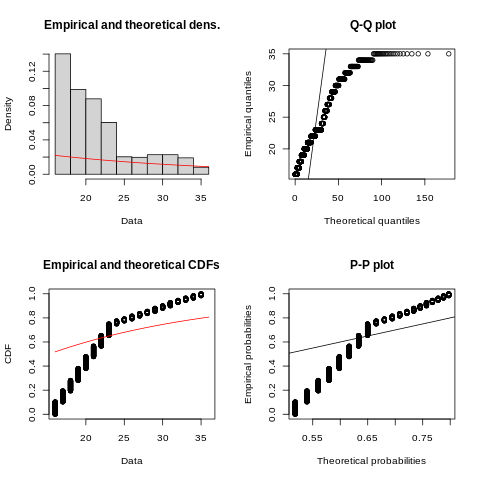

In [15]:
%%R
Edad_1<-fitdist(Estudiantes$edad,"exp",method="mle")
plot(Edad_1)

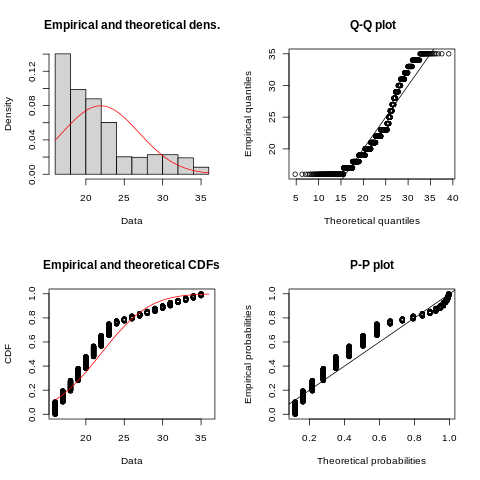

In [16]:
%%R
Edad_2<-fitdist(Estudiantes$edad,"norm",method="mle")
plot(Edad_2)

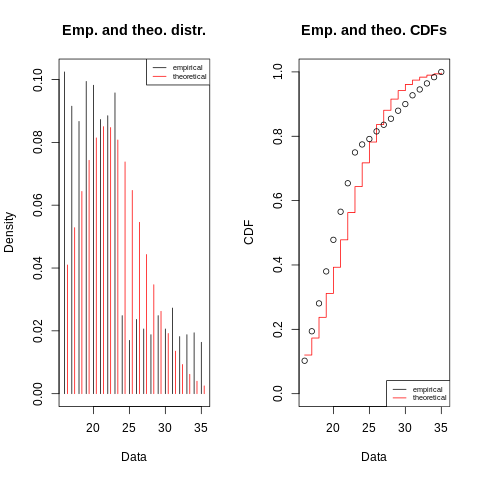

In [17]:
%%R
Edad_3<-fitdist(Estudiantes$edad,"pois",method="mle")
plot(Edad_3)

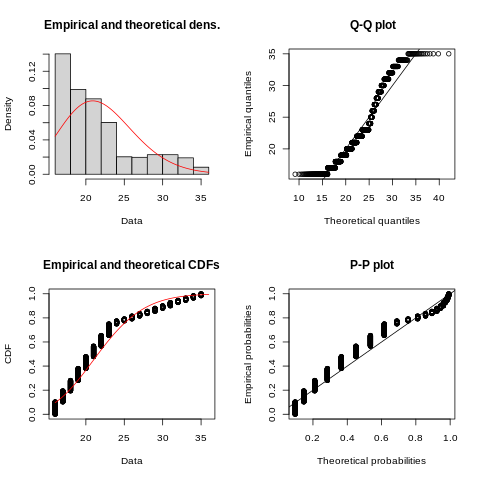

In [18]:
%%R
Edad_4<-fitdist(Estudiantes$edad,"gamma",method="mle")
plot(Edad_4)

In [19]:
#moda para la variable edad
mode_edad = df['edad'].mode()[0]
mean_edad = df['edad'].mean()

print(f"Moda de la variable edad: {mode_edad}")
print(f"Promedio de la variable edad: {mean_edad:.2f}")


Moda de la variable edad: 16
Promedio de la variable edad: 21.92


In [20]:
%%R
gofstat(list(Edad_1,Edad_2,Edad_3,Edad_4))

Goodness-of-fit statistics
                               1-mle-exp 2-mle-norm 3-mle-pois 4-mle-gamma
Kolmogorov-Smirnov statistic   0.5179878  0.1645942  0.1201127   0.1338812
Cramer-von Mises statistic   100.9809159  9.2515284  4.2987372   5.8303170
Anderson-Darling statistic   475.4665650 56.9699529 43.1367833  38.1690985

Goodness-of-fit criteria
                               1-mle-exp 2-mle-norm 3-mle-pois 4-mle-gamma
Akaike's Information Criterion  13491.06   10000.50   9887.919    9784.400
Bayesian Information Criterion  13496.47   10011.32   9893.328    9795.217


In [21]:
%%R
Edad_4

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
        estimate Std. Error
shape 21.1955913 0.73218144
rate   0.9667673 0.03379374



# **Modelo de probabilidad para la variable household**

Distribución Poisson:

La distribución Poisson es un modelo de probabilidad que permite analizar eventos que ocurren de forma aleatoria en un intervalo de tiempo y espacio.
La función de densidad de probabilidad de la distribución Poisson está dada por:

$P(x) = \frac{e^{-\theta} \theta^x}{x!}$

Donde:

* **P(x):** Probabilidad de que el evento ocurra exactamente x veces en un intervalo.
* **x:** Cantidad de veces que ocurre el suceso
* **$\theta$:** Tasa promedio de ocurrencia (usualmente $\lambda$)
* **x!:** Ajusta la probabilidad considerando el número de formas posibles en que pueden ocurrir x eventos.

La distribución de Poisson describe el número de veces que ocurre un evento en un intervalo definido, siempre que:

* Los eventos sean independientes entre sí.

* Ocurran de forma aleatoria (sin patrón fijo).

* La tasa promedio de ocurrencia ($\lambda$) sea constante

Realizando el análisis de los datos de la variable household, aplicamos la distribucion exponencial, por medio de las gráficas empíricas y teóricas identificamos que el comportamiento se encuentra por fuera de parámetros, especialmente en la gráfica de densidad y Q-Q plot, con anomalías en su comportamiento con cuantiles teóricos mayores a 5. Posteriormente la distribución normal en donde identificamos que en la gráfica de densidad no se presenta comportamiento normal, a pesar de que las barras aparentan tener comportamiento normal, las mismas se encuentran muy por encima del parámetro requerido. Para la distribución Poisson identificamos un comportamiento similiar tanto emprírico como teórico en gráfica de densidad y Función de distribución acumulada. Para corroborar que la distribución Poisson es la más adecuada, realizamos la evaluación de criterios de bondad de ajuste, por la cual los criterios Akaike y Bayesiana arrojan que la distribución Poisson presenta el valor más bajo, lo cual representa un mejor ajuste en el manejo de la distribución Poisson.

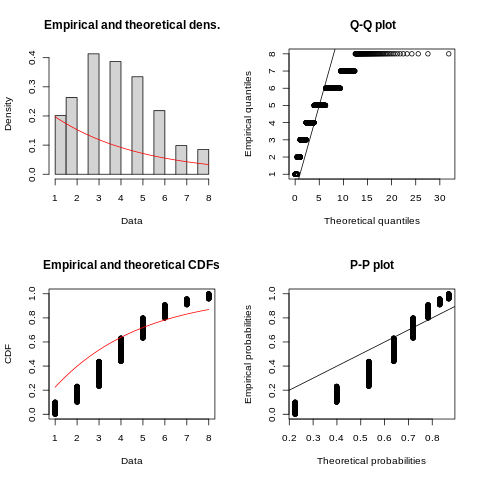

In [22]:
%%R
House_1<-fitdist(Estudiantes$household_size,"exp",method="mle")
plot(House_1)

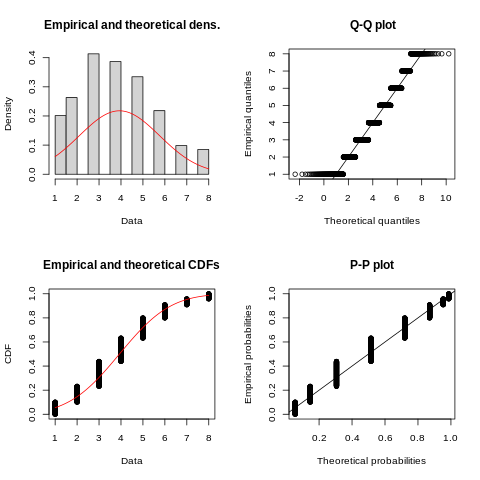

In [23]:
%%R
House_2<-fitdist(Estudiantes$household_size,"norm",method="mle")
plot(House_2)

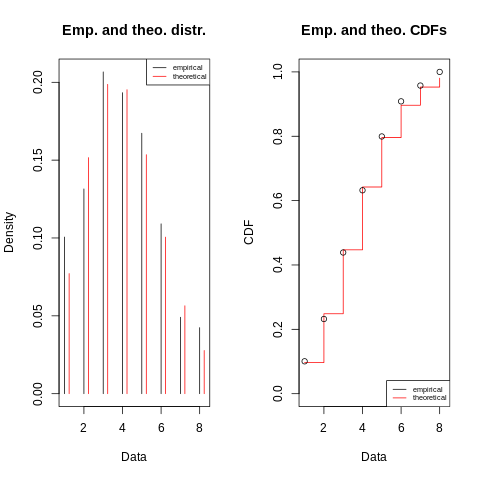

In [24]:
%%R
House_3<-fitdist(Estudiantes$household_size,"pois",method="mle")
plot(House_3)

In [25]:
%%R
gofstat(list(House_1,House_2,House_3))

Goodness-of-fit statistics
                               1-mle-exp 2-mle-norm 3-mle-pois
Kolmogorov-Smirnov statistic   0.3016982  0.1330718  0.2149622
Cramer-von Mises statistic    39.6733846  4.1291779 15.3474099
Anderson-Darling statistic   207.4878772 24.7187757 80.8131995

Goodness-of-fit criteria
                               1-mle-exp 2-mle-norm 3-mle-pois
Akaike's Information Criterion  7819.273   6685.046   6644.360
Bayesian Information Criterion  7824.682   6695.863   6649.768


In [26]:
%%R
House_3

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters:
       estimate Std. Error
lambda 3.930909 0.04880952


### **Modelo de probabilidad para la variable num_siblings**  

Distribución Normal:

La distribución normal es un modelo de probabilidad continua que describe cómo se distribuyen los valores de una variable aleatoria alrededor de su media.

La función de densidad de probabilidad de la distribución Normal está dada por:

$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \, e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$

Donde:

* **x:** Valor de la variable aleatoria
* **μ:** Media, centro de distribución.
* **σ:** Desviación estándar, permite identificar que tanto se alejan los valores del promedio (entre más bajo mejor)
* **e:** Constante de Euler, cálculo para identificar como disminuye la probabillidad al alejarse de la media, equivalente a 2,71828
* **π:** Constante pi, su cálculo permite integrar probabilidades, representando adecuadamente la probabildiad, equivalente a 3,1416

Realizando el análisis de los datos de la variable num_siblings, aplicamos la distribucion exponencial, por medio de las gráficas empíricas y teóricas identificamos que el comportamiento se encuentra por fuera de parámetros, especialmente en la gráfica de densidad, únicamente la data de 4 número de hermanos se encuentra dentro del parámetro, los demás valores se encuentran por fuera y Q-Q plot, con anomalías en su comportamiento con cuantiles teóricos mayores a 2. Posteriormente la distribución Gamma en donde identificamos que en la gráfica de densidad no se presenta comportamiento adecuado; se repite la constante de la distribución anterior (solo variable de 4 hermanos dentro de los límites, adicionalmente se refleja asimetría positiva, sesgando la información de  npumero de hermanos mayor que 1, para la gráfica Q-Q Plot los cuantiles teóricos entre 6 y 10 presentan bastante dispersión, lo que refleja onconsistencia en la distribución. Para la distribución Normal identificamos un comportamiento similiar tanto emprírico como teórico en gráfica de densidad, dado que el número de hermanos mayor a 2 se encuentra cerca a los parámetros y Q-Q plot presenta el mejor comportamiento de las 3 distribuciones evaluadas. Para corroborar que la distribución Normal es la más adecuada, realizamos la evaluación de criterios de bondad de ajuste, por la cual los criterios Akaike y Bayesiana arrojan que la distribución Normal presenta el valor más bajo, lo cual representa un mejor ajuste en el manejo de la distribución Normal.



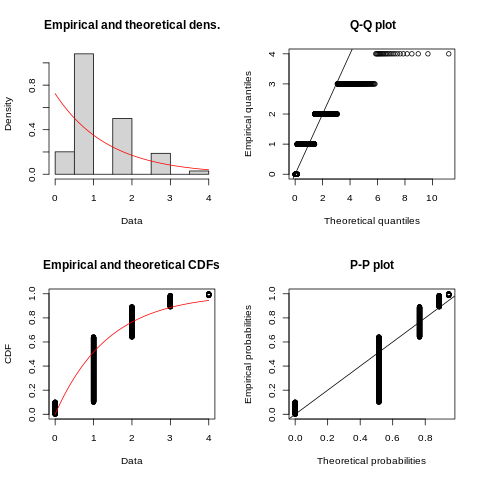

In [27]:
%%R
Siblings_1<-fitdist(Estudiantes$num_siblings,"exp",method="mle")
plot(Siblings_1)

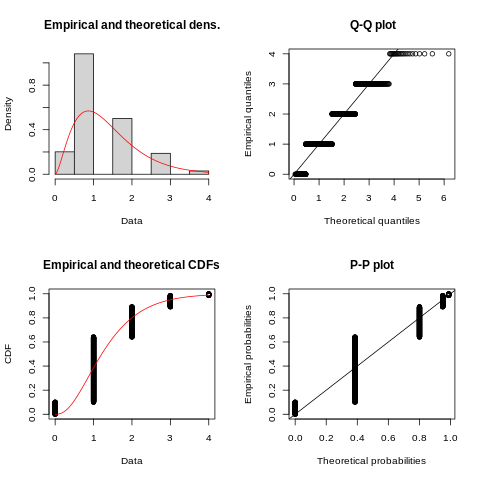

In [28]:
%%R
Siblings_2<-fitdist(Estudiantes$num_siblings,"gamma",method="mle")
plot(Siblings_2)

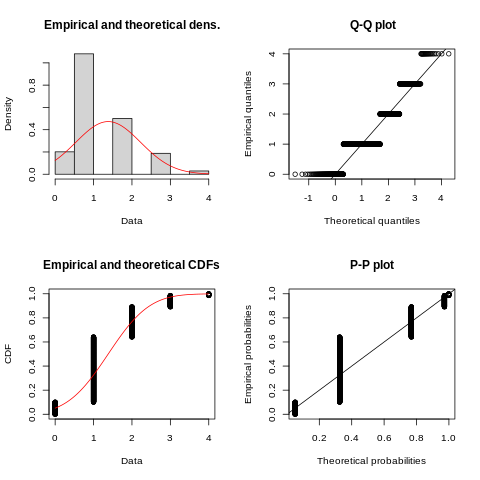

In [29]:
%%R
Siblings_3<-fitdist(Estudiantes$num_siblings,"norm",method="mle")
plot(Siblings_3)

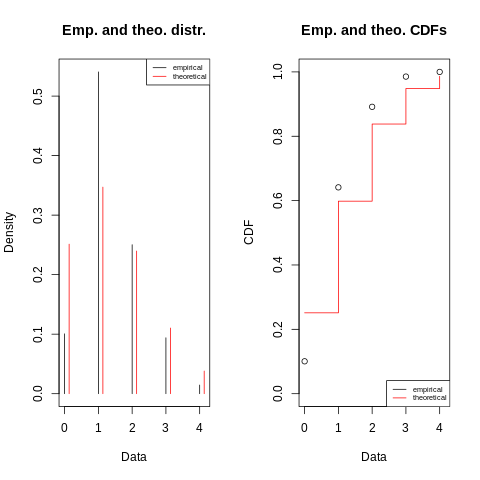

In [30]:
%%R
Siblings_4<-fitdist(Estudiantes$num_siblings,"pois",method="mle")
plot(Siblings_4)


In [31]:
%%R
gofstat(list(Siblings_1,Siblings_2,Siblings_3,Siblings_4))

Goodness-of-fit statistics
                              1-mle-exp 2-mle-gamma  3-mle-norm  4-mle-pois
Kolmogorov-Smirnov statistic  0.4145857   0.2847936   0.3154694   0.4977301
Cramer-von Mises statistic   43.6063809  25.2518822  26.1359968  79.1132435
Anderson-Darling statistic          Inf         Inf 128.8899724 365.0900463

Goodness-of-fit criteria
                               1-mle-exp  2-mle-gamma 3-mle-norm 4-mle-pois
Akaike's Information Criterion  4367.773 7.086696e+12   4126.616   4368.473
Bayesian Information Criterion  4373.181 7.086696e+12   4137.433   4373.882


In [32]:
%%R
Siblings_3

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
      estimate Std. Error
mean 1.3812121 0.02077663
sd   0.8439509 0.01469121


# **VARIABLE RESIDENCE**
# **DISTRIBUCIÓN DE PROBABILIDAD BINOMIAL**

FUNCION DE DISTRIBUCION

$
F(x) = P(X \le x) = \sum_{k=0}^{x} \binom{n}{k} p^k (1 - p)^{n - k}
$



Donde:

$X$ = número de individuos que viven en zona urbana (éxitos),\
$n$ = número total de individuos (tamaño de la muestra),\
$p$ = probabilidad de éxito (probabilidad de vivir en zona urbana),\
$k$ = número de éxitos observados.

$x$=0.78\
$n$=1650\
$p$=1300

La probabilidad de que como máximo 1300 de las 1650 personas vivan en zona urbana es aproximadamente 78.8%.

Esto significa que, bajo el modelo binomial con $p$=0.78, es bastante probable observar un número de residentes urbanos igual o menor a 1300.

El valor esperado de la distribución es 1287, por lo que 1300 está ligeramente por encima del promedio, en una zona de probabilidad alta de la distribución acumulada.

El gráfico de barras indica que el 78% de los estudiantes radican en la zona urbana y solo el 22% se hospeda en zona rural.

(array([0, 1]), [Text(0, 0, 'Urbano'), Text(1, 0, 'Rural')])

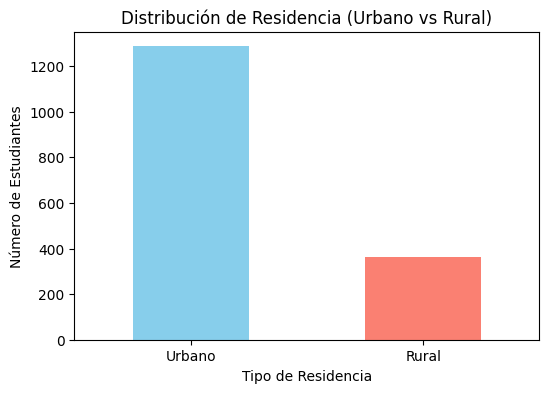

In [33]:
# grafico de la  variable 'residence'
residence_counts = df['residence'].value_counts()
total_students = residence_counts.sum()
residence_percentages = residence_counts / total_students * 100

plt.figure(figsize=(6, 4))
ax = residence_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Residencia (Urbano vs Rural)')
plt.xlabel('Tipo de Residencia')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)



#**VARIABLE ESTRATO**

#*El modelo probabilístico adecuado para esta variable es la distribución multinomial.*

Este modelo describe la probabilidad de observar una combinación de conteos $(n_1,n_2,n_3,...,n_6)$ de estudiantes en cada estrato, dado un tamaño total de muestra 𝑛 y un conjunto de probabilidades verdaderas $(p_1,p_2,...,p_6)$

**PARÁMETROS**

Los parámetros del modelo son las probabilidades $p_1,p_2,...,p_6$, que representan la proporción de la población estudiantil que pertenece a cada estrato.

En este caso:

* $p_1$: probabilidad de que un estudiante sea del estrato 1.
* $p_2$: probabilidad de que un estudiante sea del estrato 2.
* ....
* $p_6$: probabilidad de que un estudiante sea del estrato 6.


La condición $\sum_{j=1}^{6} p_j = 1$ garantiza que todos los posibles estratos estén representados en la distribución.

$$
\hat{p}_j = \frac{n_j}{n}
$$

En el conjunto de datos (n = 1650).

**FUNCIONES DE PROBABILIDAD ESTIMADAS**

La función de probabilidad estimada del modelo multinomial se obtiene reemplazando los parámetros verdaderos $p_j$ por sus estimaciones $\hat{p}_j$:


$
\hat{f}(n_1, \ldots, n_6)=\frac{1650!}{n_1!,n_2!..n_6!}
(0.2539)^{n_1} (0.3085)^{n_2} (0.2297)^{n_3} (0.1248)^{n_4} (0.0503)^{n_5} (0.0327)^{n_6}
$

$$
\hat{P}(X = j) = \hat{p}_j
$$

$
\hat{P}(X = 1) = 0.2539
$ - Alrededor del 25.39 % pertenece al estrato 1, y así sucesivamente.

$
\hat{P}(X = 2) = 0.3085
$ - Aproximadamente el 30.85 % de los estudiantes pertenece al estrato 2.

**Función de densidad de probabilidad**

$\displaystyle{f(x)=\frac{x^{\alpha-1}e^{-\frac{x}{\beta}}}{\beta^{\alpha}\Gamma(\alpha)}}$

donde $\alpha$ es el parámetro de forma y $\beta$ es el parámetro de escala

Entonces respecto a los resultados se tiene que $\alpha=21.19$

y se tiene que rate $\frac{1}{\beta}=0.09$ luego $\beta=11.11$

Luego la **Función de densidad de probabilidad es:**

$\displaystyle{f(x)=\frac{x^{20.19}e^{-\frac{x}{11.11}}}{11.11^{21.19}\Gamma(21.19)}}$ para todo $x>16$

Se puede destacar que el 56% de los estudiantes pertenecen  a al institucion pertenecen a los estratos 1 y 2, y el 44% restante pertenecen a los estratos comprendidos del 3 al 6, siendo este ultimo el de menor concentracion de estudiantes con tan solo un 3.3% del estudiantando.

In [34]:
%%R
# Seleccionar variable Estrato
estrato=as.factor(Estudiantes$estrato)

# Tabla de frecuencias
tabla_estrato=table(estrato)
tabla_estrato

estrato
  1   2   3   4   5   6 
419 509 379 206  83  54 


In [35]:
%%R
# Probabilidades estimadas (MLE)
p_hat <- prop.table(tabla_estrato)
p_hat

# Tamaño de muestra
n <- length(estrato)
n

[1] 1650


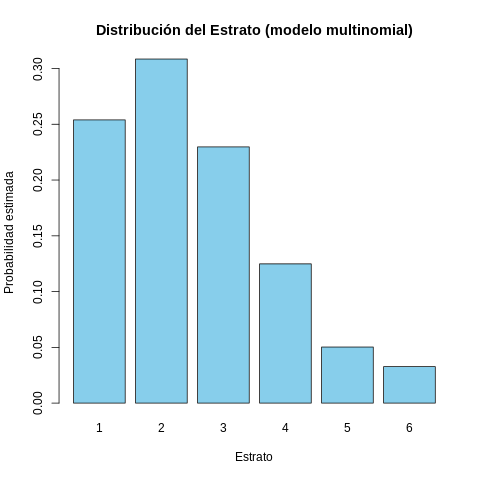

In [36]:
%%R
barplot(p_hat,
        main = "Distribución del Estrato (modelo multinomial)",
        col = "skyblue",
        ylab = "Probabilidad estimada",
        xlab = "Estrato")

# **Variable Puntaje de icfes**

La ecuación que has compartido es la forma estándar de la distribución normal o distribución gaussiana, la cual es una de las distribuciones de probabilidad más comunes en estadísticas y probabilidad. La forma
$f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}$

Donde:

$f(z)$: Es la función de densidad de probabilidad. Nos dice la probabilidad de que una variable aleatoria continua

$z$ tome un valor específico en torno a una media de 0 y una desviación estándar de 1.

$z$ : Es una variable que representa un valor estandarizado de una variable aleatoria, que se obtiene de la fórmula:

$z = \frac{X - \mu}{\sigma}$

donde:

X es el valor observado,

μ es la media de la distribución,

σ es la desviación estándar

Para esta ocasión, en la variable puntaje_icfes aplicamos la distribucion exponencial y normal, con resultados muy similares dentro de los ajustes para los parámetros teóricos de densidad y empicos, Q-Q plot, CDYs y P-P plot, como se ven en las siguientes graficas. Por lo cual se  acude a revisar los criterios de Akaike y Bayensiano para comparar y seleccionar el mejor modelo que demuestre la bondad de ajuste con la complejidad del modelo, concluyendo la escogencia de la distribucion normal al tener valores inferiores de 18282 y 18293 respectivamente.

El promedio de puntaje ICFES  es de 299.39 puntos, dentro de un rango de 32 a 500, lo que indica que el grupo  se encuentra ligeramente por debajo del promedio nacional estimado (310–320 puntos). Esto sugiere un nivel de desempeño académico general algo bajo o cercano al promedio bajo.

La desviación estándar de 61.57 puntos es moderadamente alta, lo que implica una varianza significativa en los resultados: hay estudiantes con puntajes considerablemente más altos y otros mucho más bajos que la media.


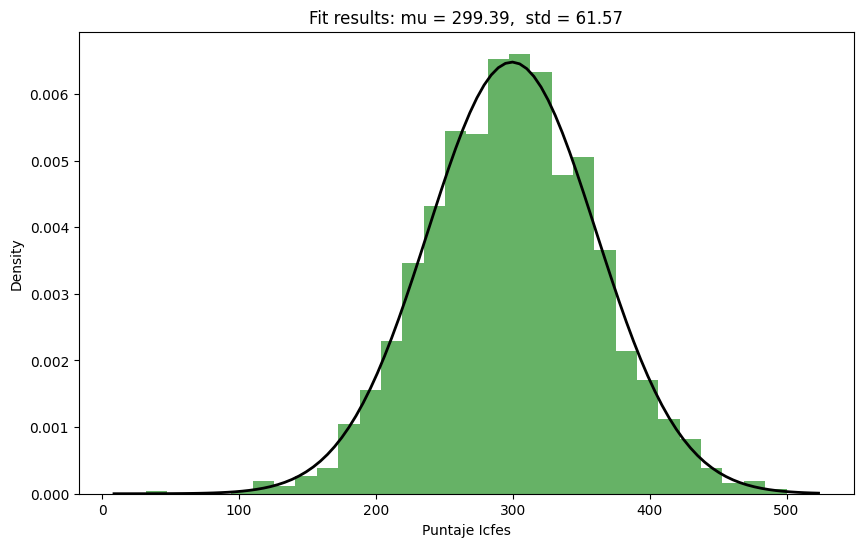

media - Puntaje Icfes: 299.39
Desviacion estandar of Puntaje Icfes: 61.57


In [37]:
# Para la variable puntaje_icfes
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

puntaje_icfes_data = df['puntaje_icfes']

# Media y desviacion estandar
mean_icfes = puntaje_icfes_data.mean()
std_icfes = puntaje_icfes_data.std()

#Hsitograma
plt.figure(figsize=(10, 6))
plt.hist(puntaje_icfes_data, bins=30, density=True, alpha=0.6, color='g')

# Dsitribucion normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_icfes, std_icfes)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mean_icfes, std_icfes)
plt.title(title)
plt.xlabel("Puntaje Icfes")
plt.ylabel("Density")
plt.show()

print(f"media - Puntaje Icfes: {mean_icfes:.2f}")
print(f"Desviacion estandar of Puntaje Icfes: {std_icfes:.2f}")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/fitdistrplus_1.2-4.tar.gz'
Content type 'application/x-gzip' length 2483646 bytes (2.4 MB)
downloaded 2.4 MB


The downloaded source packages are in
	‘/tmp/RtmpTjtpL1/downloaded_packages’


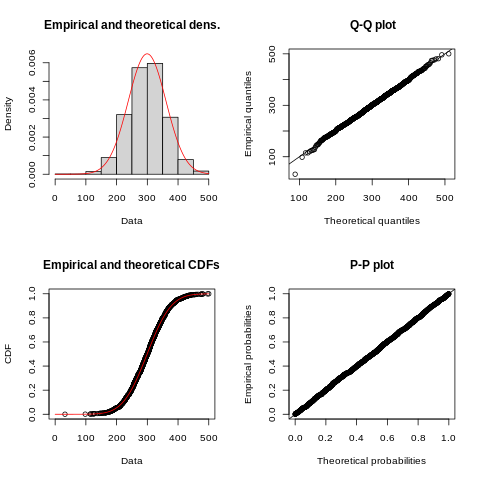

In [38]:
%%R -i df
# Install and load the fitdistrplus package
install.packages("fitdistrplus")
library(fitdistrplus)
# Now you can use the fitdist function
Ajuste_1<-fitdist(df$puntaje_icfes,"norm",method="mle")
plot(Ajuste_1)

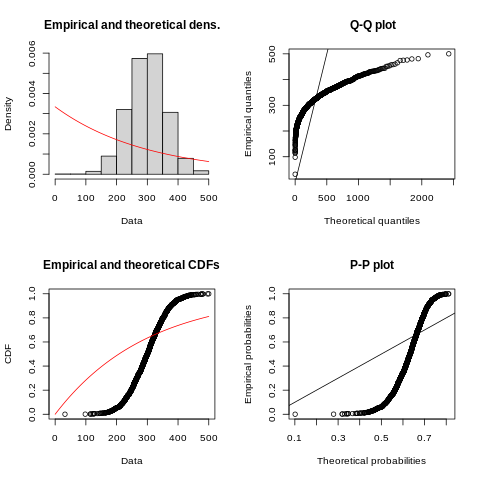

In [39]:
%%R -i df
Ajuste_2<-fitdist(df$puntaje_icfes,"exp",method="mle")
plot(Ajuste_2)

In [40]:
%%R -i df
gofstat(list(Ajuste_1,Ajuste_2))


Goodness-of-fit statistics
                             1-mle-norm   2-mle-exp
Kolmogorov-Smirnov statistic 0.01228042   0.4407998
Cramer-von Mises statistic   0.02700833 101.5838040
Anderson-Darling statistic   0.20435720 481.7860549

Goodness-of-fit criteria
                               1-mle-norm 2-mle-exp
Akaike's Information Criterion   18282.22  22117.76
Bayesian Information Criterion   18293.03  22123.16


In [41]:
%%R -i df
Ajuste_1

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
      estimate Std. Error
mean 299.38909   1.515356
sd    61.55403   1.071518


# **Variable Promedio académico **

La variable promedio academico se realiza el analisis con la  mejor la distribución normal o distribución gaussiana, la cual es una de las distribuciones de probabilidad. La forma

$f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}$

Donde:

$f(z)$: Es la función de densidad de probabilidad. Nos dice la probabilidad de que una variable aleatoria continua

$z$ tome un valor específico en torno a una media de 0 y una desviación estándar de 1.

$z$ : Es una variable que representa un valor estandarizado de una variable aleatoria, que se obtiene de la fórmula:

$z = \frac{X - \mu}{\sigma}$

donde:

X es el valor observado,

μ es la media de la distribución,

σ es la desviación estándar

AL estudiar la variable promedio_academico El promedio académico de 3.7 sobre una escala de 1 a 5 sugiere un desempeño global bastante bueno, ya que está bastante cerca de 5. Este promedio puede indicar que la mayoría de los estudiantes están obteniendo buenos resultados académicos.

Para este caso aplicamos la distribucion gamma y normal, con resultados muy similares dentro de los ajustes para los parámetros teóricos de densidad y empicos, Q-Q plot, CDYs y P-P plot, como se ven en las siguientes graficas. Por lo cual se  acude a revisar los criterios de Akaike y Bayensiano para comparar y seleccionar el mejor modelo que demuestre la bondad de ajuste con la complejidad del modelo, concluyendo la escogencia de la distribucion normal al tener valores inferiores de 3577 y 3588 respectivamente.


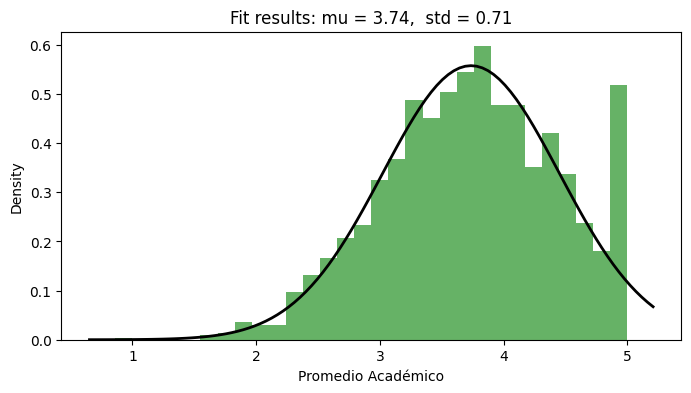

Media - Promedio Académico: 3.74
Desviación estándar de Promedio Académico: 0.71


In [42]:
promedio_academico_data = df['promedio_academico']

# Media y desviacion estandar
mean_academico = promedio_academico_data.mean()
std_academico = promedio_academico_data.std()

# Histograma
plt.figure(figsize=(8, 4))
plt.hist(promedio_academico_data, bins=30, density=True, alpha=0.6, color='g')

# Distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_academico, std_academico)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mean_academico, std_academico)
plt.title(title)
plt.xlabel("Promedio Académico")
plt.ylabel("Density")
plt.show()

print(f"Media - Promedio Académico: {mean_academico:.2f}")
print(f"Desviación estándar de Promedio Académico: {std_academico:.2f}")

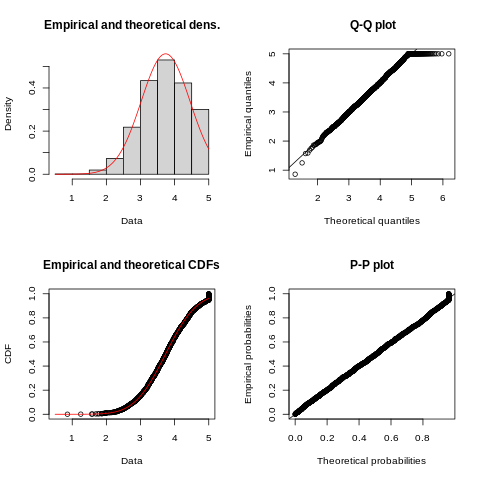

In [43]:
%%R -i df
# Now you can use the fitdist function
Ajuste_3<-fitdist(df$promedio_academico,"norm",method="mle")
plot(Ajuste_3)

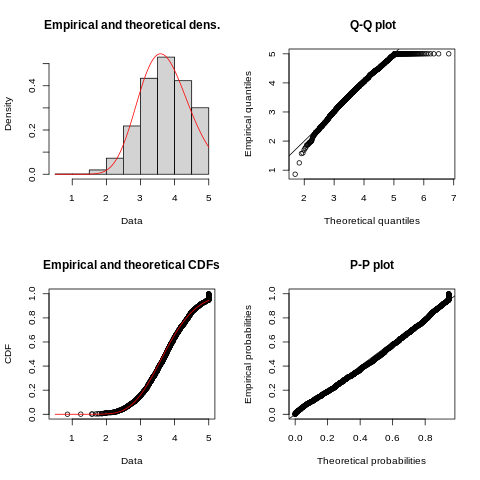

In [44]:
%%R -i df
# Now you can use the fitdist function
Ajuste_4<-fitdist(df$promedio_academico,"gamma",method="mle")
plot(Ajuste_4)

In [45]:
%%R -i df
gofstat(list(Ajuste_3,Ajuste_4))

Goodness-of-fit statistics
                             1-mle-norm 2-mle-gamma
Kolmogorov-Smirnov statistic 0.03847362  0.05472464
Cramer-von Mises statistic   0.17103746  0.77370816
Anderson-Darling statistic   2.32425253  6.15242607

Goodness-of-fit criteria
                               1-mle-norm 2-mle-gamma
Akaike's Information Criterion   3577.949    3671.307
Bayesian Information Criterion   3588.766    3682.124


In [46]:
%%R -i df
Ajuste_3

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
      estimate Std. Error
mean 3.7359636 0.01759415
sd   0.7146777 0.01244083


**Modelo de probabilidad para la variable beca**

Distribución Binomial:

La distribución binomial es un modelo de probabilidad discreta que describe el número de éxitos que se pueden obtener en un número fijo de intentos independientes, donde cada intento solo puede tener dos resultados posibles (Éxito o o fracaso).

La función de distribución binomial está dada por:

$F(x) = P(X \le x) = \sum_{k=0}^{x} \binom{n}{k} p^k (1 - p)^{n - k}$

Donde:

* **X:** Número de individuos que tienen o no tienen beca.
* **n:** Número total de individuos (tamaño de la muestra).
* **p:** Probabilidad de que la persona que tenga beca.
* **k:** Número de éxitos observados.

x = si,no\
n =1650\
p =317

Beca es variable categórica con dos resultados "si" y "no", mediante el método binomial podemos interpretar "Si" o "No" como éxito o fracaso, dependiendo de la necesidad de análisis, de otro modo. Podemos identificar la probalidad de éxito o fracaso sobre las personas que tienen o no tienen beca. Al ser una variable texto, no le podemos calcular media o desviación estándar a "si" o "no", lo cual imposibilita realizar cálculo teórico empírico para evaluar la posibilidad de cálculo mediante nuevas distribuciones.

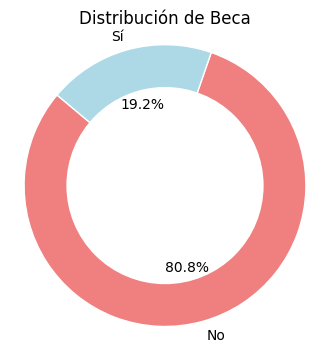

In [47]:
# Grafica de barras para beca

beca_counts = df['beca'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(beca_counts, labels=beca_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'], wedgeprops={'edgecolor': 'white'})

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribución de Beca')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()